In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
df["age"].dtype

dtype('float64')

Text(0, 0.5, 'Frequency')

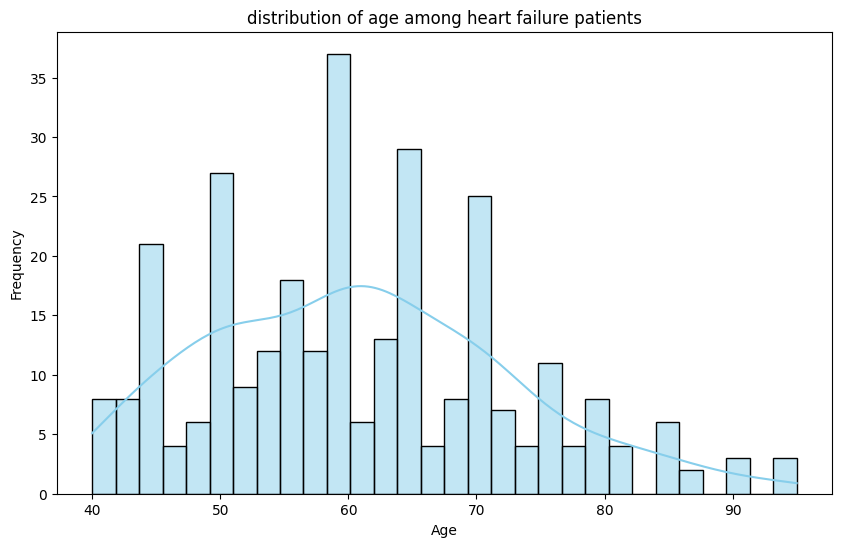

In [9]:
#1. What is the distribution of age among heart failure patients in the dataset.
plt.figure(figsize = (10,6))
sns.histplot(df["age"],kde = True,bins = 30,color = "skyblue")
plt.title("distribution of age among heart failure patients")
plt.xlabel("Age")
plt.ylabel("Frequency")

In [10]:
#insights
# highest frequency of heart attack is in age between 60-70
# after the age of 40 people start witnessing hear attacks
# less number of attacks after 90+ age

Text(0, 0.5, 'Frequency')

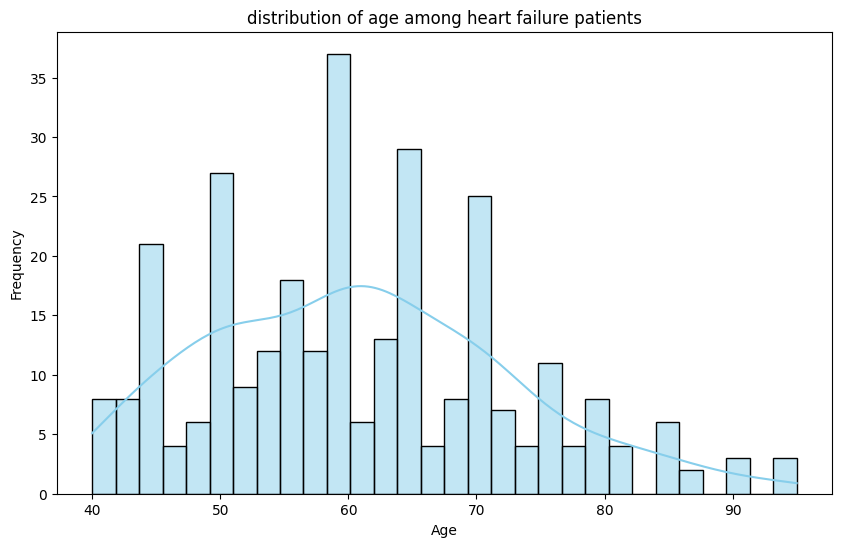

In [33]:
#2  How does the death rate vary with age?
plt.figure(figsize = (10,6))
sns.histplot(df["age"],kde = True,bins = 30,color = "skyblue")
plt.title("distribution of age among heart failure patients")
plt.xlabel("Age")
plt.ylabel("Frequency")

In [34]:
#we have drawn same graph because it also represents death rate variation with age

In [37]:
#3 What is the percentage of male and female patients in the dataset?
df["sex"].value_counts(normalize = True)

sex
1    0.648829
0    0.351171
Name: proportion, dtype: float64

<Axes: xlabel='sex', ylabel='count'>

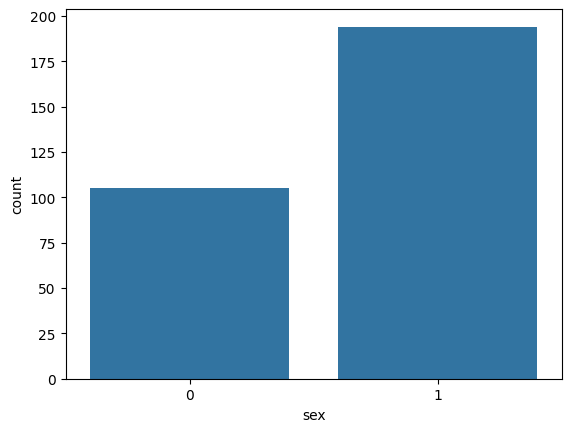

In [38]:
sns.countplot(x = df["sex"],data = df)

In [ ]:
#insights
#considering 1 as male and 0 as female
#64% are male patients
#36% are female patients
#more male patients are seen in heart disease.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


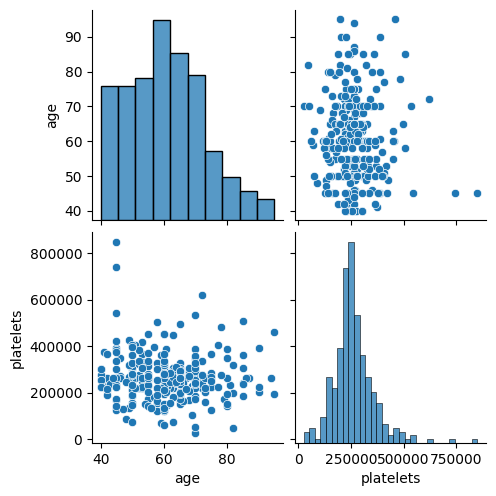

In [44]:
#4 how does the platelet count vary among different age groups
selected_columns = ["age","platelets"]
sns.pairplot(df[selected_columns],palette = 'husl')

<Axes: >

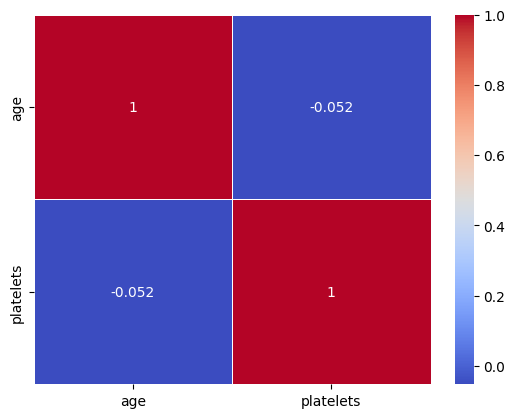

In [45]:
sns.heatmap(df[selected_columns].corr(),annot = True , cmap = "coolwarm",linewidth = .5)

In [46]:
#insights
#for most people platelets between 200000-40000 between age group 40-60 where most heart attacks occur
#heat map can show direct relation between platelets counts and age
#as age increases platelets counts also increases

<Axes: >

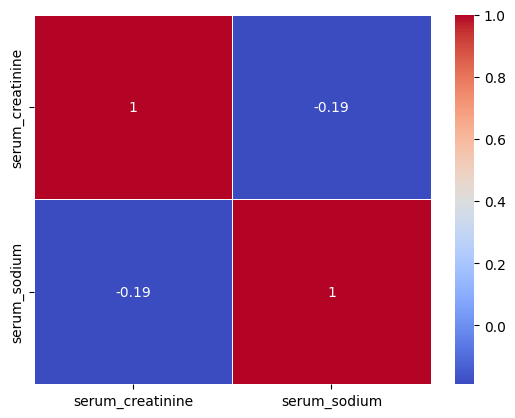

In [49]:
#5 Is there a correlation between creatinine and sodium levels in the blood?
select_columns = ["serum_creatinine","serum_sodium"]
sns.heatmap(df[select_columns].corr(),annot = True,cmap = "coolwarm",linewidth = .5)

In [50]:
#insights
#there is a negative correlation between sodium and creatinine

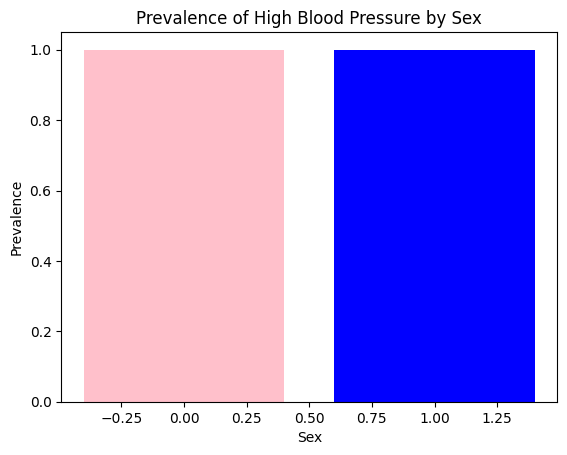

In [58]:
#6 how does the prevalence of high blood pressure differ between male and female patients?
#  bar chart
plt.bar(df['sex'], df['high_blood_pressure'], color=['blue', 'pink'])
plt.title('Prevalence of High Blood Pressure by Sex')
plt.xlabel('Sex')
plt.ylabel('Prevalence')
plt.show()

<Axes: ylabel='count'>

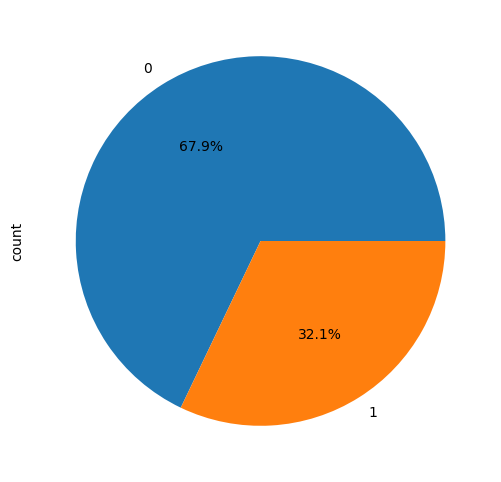

In [64]:
#7 what is the relationship between smoking habits and the occurrence of heart failure?
df["smoking"].value_counts().plot.pie(autopct = '%1.1f%%', figsize = (6, 6))

In [67]:
#insights
#32% of people who smokes ciggerates have a heart failure

Text(0, 0.5, 'Frequency')

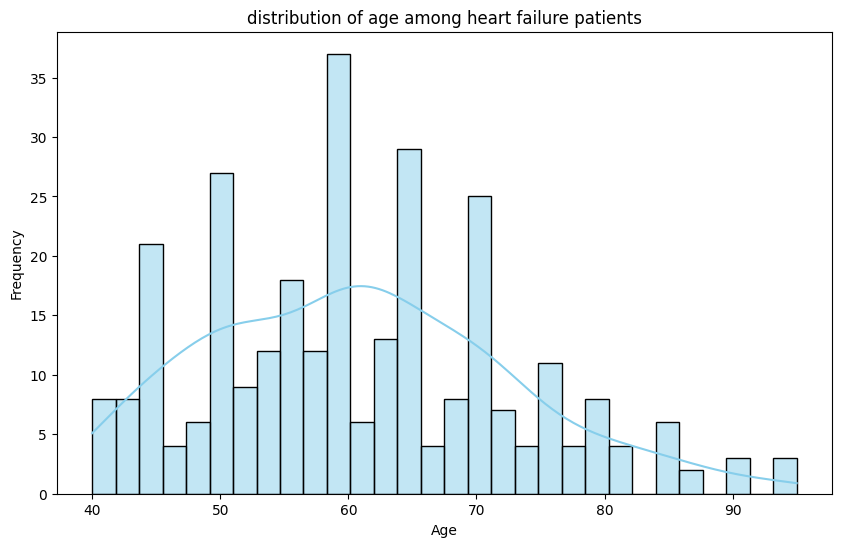

In [74]:
#8 Are there any noticable patterns in the distribution of death events across different age groups?
plt.figure(figsize = (10,6))
sns.histplot(df["age"],kde = True,bins = 30,color = "skyblue")
plt.title("distribution of age among heart failure patients")
plt.xlabel("Age")
plt.ylabel("Frequency")

In [75]:
#we have drawn this plot earlier because it showed good patterns of age vs frequency of heart failures
#most heart failure disease occure after age of 40
#high frequency is noticed betweeen age of 50-70

<ipython-input-77-37816d0bbd1b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "ejection_fraction", y ="diabetes",data = df,palette = "viridis")


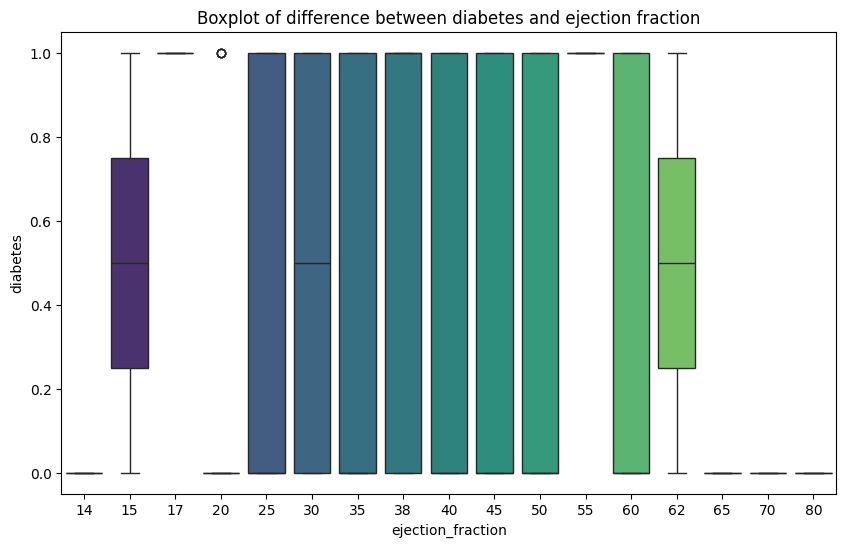

In [77]:
#9 Is there any significant difference in erection fraction between patients with and without diabetes?
plt.figure(figsize = (10,6))
sns.boxplot(x = "ejection_fraction", y ="diabetes",data = df,palette = "viridis")
plt.xlabel('ejection_fraction')
plt.ylabel('diabetes')
plt.title("Boxplot of difference between diabetes and ejection fraction")
plt.show()

In [81]:
def violin(col):
    fig = px.violin(df, y=col, x='diabetes', box =True, template = 'plotly_dark')
    return fig.show()

violin("ejection_fraction")

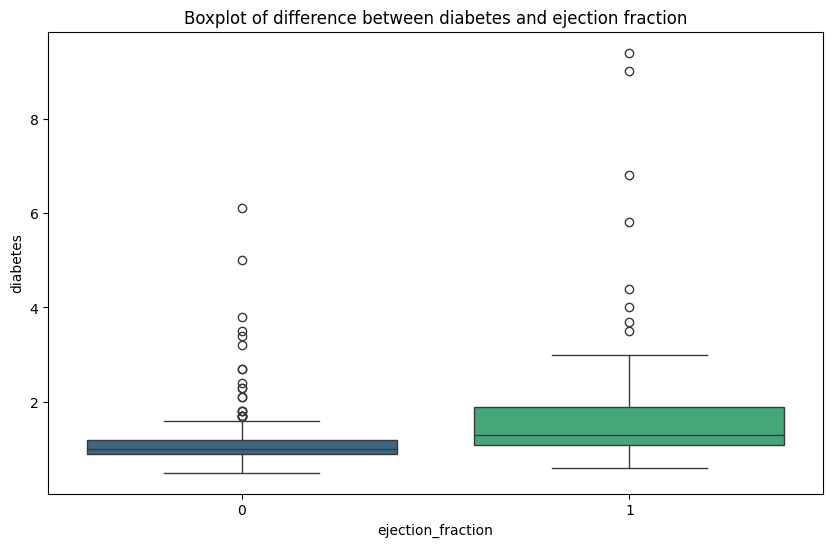

In [85]:
#10 how does the serum creatinine level vary between patients who survived and those who did not?
plt.figure(figsize = (10,6))
sns.boxplot(x = "DEATH_EVENT", y ='serum_creatinine',data = df,palette = "viridis")
plt.xlabel('ejection_fraction')
plt.ylabel('diabetes')
plt.title("Boxplot of difference between diabetes and ejection fraction")
plt.show()